In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Demade de Stage

In [2]:
df_demande=pd.read_csv("demande-stage.csv")

In [3]:
#drop nan
df_demande=df_demande.dropna()
df_demande[['niveau', 'ecole']] = df_demande["formation"].apply(lambda x: pd.Series(str(x).split(",")))
df_demande['periode'] = df_demande["periode"].apply(lambda x: pd.Series(str(x).split()[0]))
#periode to numeric
df_demande['periode']= pd.to_numeric(df_demande['periode'])
#split formation to niveau and ecole
df_demande=df_demande.drop('formation', axis=1)
df_demande.head(10)

,location,name,periode,startDate,niveau,ecole
0,Casablanca,Stagiaire en Comptabilité Audit et Finance,6,01/01/2023,Bac+5,ESCA
1,Casablanca,Stagiaire en Comptabilité Audit et Finance,4,01/02/2023,Bac+5,ENCG Casablanca
2,Casablanca,Stagiaire en Gestion des Entreprises et des Ad...,2,02/01/2023,Bac+2,ESCA
3,Ouarzazate,Stagiaire en Développement informatique,2,10/01/2023,Bac+3,Autre
4,Agadir,Stagiaire en Gestion Commerciale,3,30/01/2023,Bac+3,ISIAM Agadir
5,Casablanca,Stagiaire en Génie Mécanique &amp; Productique,5,01/02/2023,Bac+4,ENSAM Casablanc…
6,Tanger,Stagiaire en Gestion des Ressources Humaines,4,01/03/2023,Bac+5,Autre
7,Salé,Stagiaire en Ingénierie des Systèmes d'Informa...,6,10/02/2023,Bac+5,Ecole VINCI
8,Agadir,Stagiaire en Ingénierie en Finance et Actuariat,4,01/02/2023,Bac+3,ENSA Agadir
9,Casablanca,Stagiaire en Management &amp; Stratégie,6,01/03/2023,Bac+5,Ecole Centrale …


In [4]:
loc = df_demande.groupby(['location']).size().reset_index(name='count')
loc= loc[loc['count'] >3]
loc=loc.sort_values('count',ascending=False)

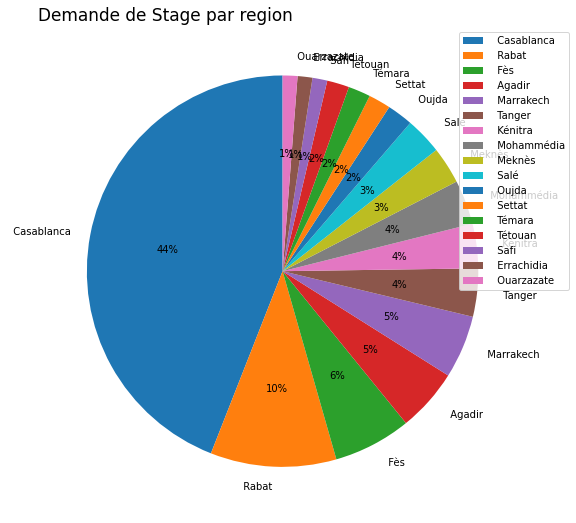

In [5]:
fig1, ax1 = plt.subplots(figsize=(9, 9))
plt.pie(loc['count'], labels=loc['location'], autopct='%1.0f%%', startangle=90)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left')
plt.title("Demande de Stage par region", loc="left",fontsize=17)
plt.show()

In [6]:
niveau = df_demande.groupby(['niveau']).size().reset_index(name='count')
niveau= niveau[niveau['count'] >1]
niveau=niveau.sort_values('count',ascending=False)

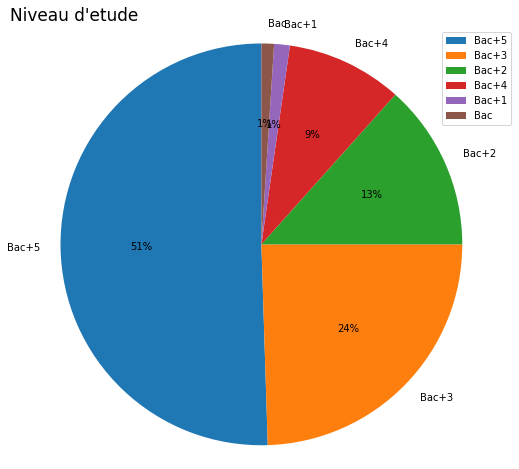

In [7]:
fig1, ax1 = plt.subplots(figsize=(9, 8))
ax1.axis('equal')
plt.pie(niveau['count'], labels=niveau['niveau'], autopct='%1.0f%%', startangle=90)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left')
plt.title("Niveau d'etude", loc="left",fontsize=17)
plt.show()

### Les periode de stage

In [8]:
df_demande["periode"].describe()

count    398.000000
mean       3.934673
std        1.744586
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        6.000000
Name: periode, dtype: float64

### Sujet les plus demande

In [9]:
name = df_demande.groupby(['name']).size().reset_index(name='count')
name= name[name['count'] >3]
name=name.sort_values('count',ascending=False)
#name.head(10)

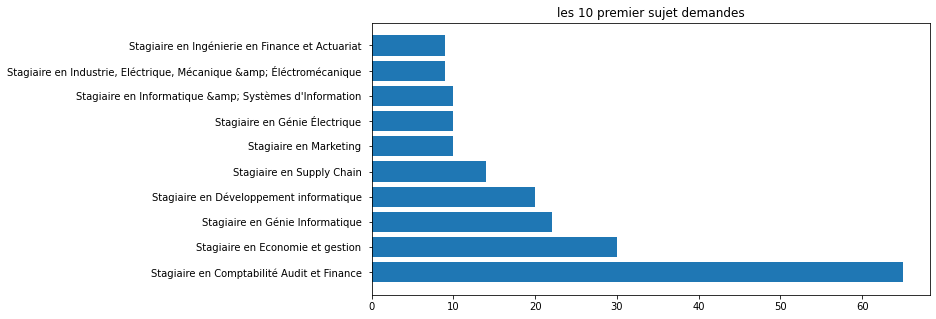

In [10]:
fig = plt.figure(figsize = (10, 5))

plt.barh(name.head(10)["name"], name.head(10)["count"])
plt.title("les 10 premier sujet demandes")
plt.show()

## Offre de Stage

In [11]:
offre_indeed=pd.read_csv("indeed.csv")
offre_rekrute=pd.read_csv("rekrute.csv")
offre_stagiaire=pd.read_csv("stagiaire.csv")

In [12]:
offre_indeed=offre_indeed.dropna()

In [13]:
offre_rekrute=offre_rekrute.dropna()
offre_rekrute['location'] = offre_rekrute["location"].apply(lambda x: pd.Series(str(x).split()[0]))

In [14]:
offre_stagiaire=offre_stagiaire.dropna()

In [15]:
dft=pd.concat([offre_indeed[['name', 'company','location']], offre_rekrute[['name', 'company','location']], offre_stagiaire[['name', 'company','location']]], ignore_index=True)

In [16]:
dft.sample(10)

,name,company,location
15,Centre d'appel recrute en masse :,RH-RECRUTE,Région de Casablanca-Settat
64,Stage en Marketing Digital,EMFA TRADING (EDUNOVA),Casablanca
29,Stagiaire assistante,BREAKER MAROC,Tamesna
66,Stage en marketing &amp; communication,akare,Casablanca
13,Stagiaire-achat,houd,Marrakech
21,Stagiaire Téléphonie sur IP,IT Cube,Casablanca
27,Agent de confirmation et de suivi des commandes,Quick Livraison,Casablanca
20,Offre: Architecte stagiaire,TASMIM ARCHITECTURE,Rabat
81,Stage en Génie Informatique,WEBEX AG,Casablanca
48,"Stage PFE : Développeur JEE, Dot Net, Oracle,...",CGI Technologies et Solutions Maroc,Fès


[]

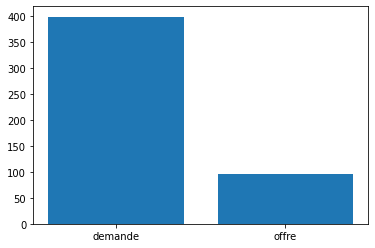

In [17]:
plt.bar(["demande", "offre"], [len(df_demande.index),len(dft.index)])
plt.plot()